<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch7_1~5_pg_409~451(%EA%B5%B0%EC%A7%91%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07 군집화

# 01 K- 평균 알고리즘 이해

- 군집 중심점(centroid)라는 특정한 임의의 지점을 선택해 해당 줌심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화 하는 기법
- 즉, 중심점을 이동해도 데이터들의 중심점 소속 변경이 없으면 군집화 완료


## 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

## 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우, 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집을 선택해야 할 지 가이드하기 어려움

# Sklearn KMeans 클래스 소개


```
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto'
```

)

# 주요 파라미터
- n_clusters : 군집중심점 개수
- init : 초기 군집 중심점 좌표 설정 방식, 일반적으로 k-means++
- max_iter : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동 없을 경우 종료

# 주요 속성 정보
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표. (shape는 [군집개수, 피처개수]). 군집 중심점 좌표 시각화에 사용

# K-평균을 이용한 붓꽃 데이터 세트 군집화
- 붓꽃의 꽃받침과 꽃잎 길이와 너비에 따른 품종을 분류하는 데이터 세트

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# 3개 그룹으로 군집화 : n_cluster=3 , max_iter=300(디폴트)으로 설정

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

# 데이터 소속 확인 : labels_ 출력

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# 붓꽃 품종 분류 값과 실제로 얼마나 차이가 나는지(군집화 효과) 확인

In [5]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타깃이 0인 데이터는 모두 1번 군집으로 잘 갔지만, 3번 군집으로 가야 할 데이터들이 분산됨

# 붓꽃 데이터 세트 군집화 시각화
- 붓꽃 데이터 세트 속성 4개이므로 PCA 통해 2개로 차원 축소

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


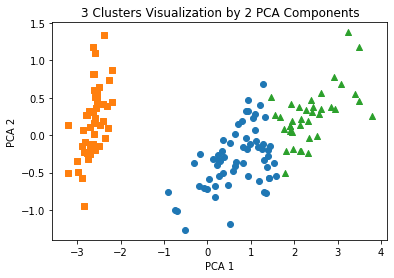

In [7]:
# 군집 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- 속성 위치 자체가 명확히 분리되기 어려운 속성이 존재

# 군집화 알고리즘 테스트를 위한 데이터 생성
- 대표적인 군집화용 데이터 생성기 : make_blobs(), make_classification() API 등
- 여러개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음
> make_classification(): 노이즈를 포함한 데이터를 만드는 데 유용
> make_blobs(): 군집의 중심점과 표준 편차 제어 기능 존재 (사용법 아래)
>> - 호출 시 피처 & 타깃 데이터 세트 튜플로 반환
>>- n_samples : 생성할 총 데이터의 개수 (디폴트 : 100)
>>- n_features : 데이터의 피처 개수. 시각화의 경우, 보통 첫 번째 피처가 x 좌표
>>- centers : int로 설정 시 군집 개수, ndarray로 표현 시 개별 군집 중심점의 좌표
>>- cluster_std : 생성될 군집 데이터의 표준 편차. 군집별 표준편차 다르게 설정시 리스트 이용

- 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


# 데이터 프레임으로 변환

In [9]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


# 군집화 분포 확인

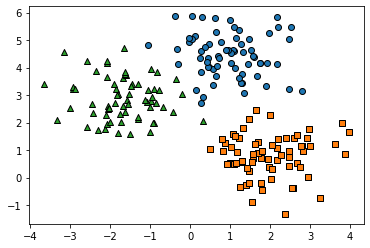

In [10]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers=['o', 's', '^', 'P','D','H','x']

# 3개의 군집 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

# 위 데이터 세트에 군집화 수행 후 군집별 시각화 

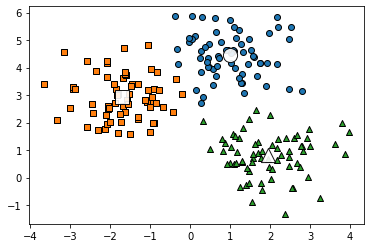

In [11]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='' % label)

plt.show()

# 군집 결과 확인

In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- c.f : cluster_std가 작을수록 군집 중심에 데이터가 모여 있고, 클수록 데이터가 퍼짐

# 군집 평가

- 대부분의 군집화 데이터 세트는 비교할만한 타깃 레이블을 가지고 있지 않음 --> 실루엣 분석 사용

# 실루엣 분석의 개요
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리되었다. = 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다.
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것
> - a(i): 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
> - b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
> - b(i)-a(i): 두 군집 간의 거리가 얼마나 떨어져 있는가의 값. 이 값을 정규화 하기 위해 MAX(a(i),b(i)) 값으로 나눔
> - i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의
>> s(i) = (b(i)-a(i)) / MAX(a(i),b(i))
> - 실루엣 계수는 -1~1. 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것. 0에 가까울수록 근처의 군집과 가까워진다는 것, - 값은 아예 다른 군집에 데이터 포인트가 할당됐음


사이킷런 메소드
```
sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds) 
```
: 각 데이터 포인트의 실루엣 계수 계산해 반환

```
sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)
```
 : 전체 데이터의 실루엣 계수 값 평균해 반환. 높을수록 군집화 잘됐다고 판단 가능하지만 절대적 x



# 좋은 군집화 기준

1. 전체 실루엣 계수의 평균값(silhouette_score)이 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 함.  

# 붓꽃 데이터 세트를 이용한 군집 평가
- 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 값이 약 0.554
- 1번 군집의 경우, 0.8 이상의 높은 실루엣 계수값


# 평균 실루엣 계수 값
- IrisDF 데이터 프레임에서 군집 칼럼별로 group by 하여 실루엣 coeff 칼럼의 평균값을 구함

In [14]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 상대적으로 평균값이 1번에 비해 낮다는 것을 알 수 있다.

# 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
- 전체 데이터의 평균 실루엣 계수 값이 높다고 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음
- 특정 군집 내의 실루엣 계수 값만 너무 뫂고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다.
- 개별 군집별로 적당히 분리된 거리를 유지하면서 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단

In [15]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
     

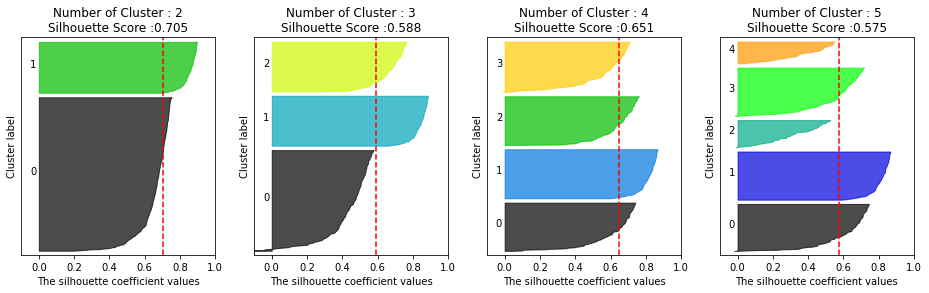

In [16]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

- 4개의 군집일 때 가장 최적이 됨

# 붓꽃 데이터를 이용해 K- 평균 수행 시 최적의 군집 개수를 알아보기

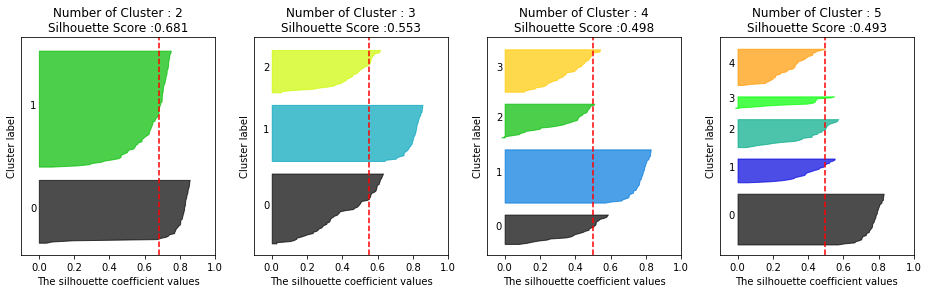

In [17]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

- K-평균의 경우 군집화할 경우 2개의 군집이 가장 좋아 보임


- 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉬움
- 하지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로, 데이터 양이 늘어나면 수행 시간이 크게 늘어남.
- 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민

# 03 평균 이동

# 평균 이동(Mean Shift)의 개요
- 중심을 군집으로 지속적으로 움직이면서 군집화 수행
- 중심 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동하는 것이 차이
- 데이터의 분포도를 이용해 군집 중심점을 찾음
- 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안, 이를 위해 확률 밀도 함수를 이용
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정. 일반적으로 확률 밀도 함수를 찾기 위해 KDE를 이용함
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤, 그 반환 값을 현재 위치에서 업데이터하면서 이동하는 방식을 취함. 

1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3. 모든 데이터를 1~2까지 수행하면서 데이터를 이동, 개별 데이터들이 군집중심점으로 모임
4. 지정된 반복 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행
5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정

# KDE
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 추정. (ex : 가우시안 분포 함수)

- 대역폭 H

> - KDE형태를 부드러운 형태로 평활화 하는데 적용되며 이 H를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 좌우한다.
> - 작은 값 H (1.0): 좁고 뾰족한 KDE를 가지게 되며, 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움. -> 많은 수의 군집 중심점
> - 높은 값 H(10) : 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합 하기 쉬움. -> 적은 수의 군집 중심점

- 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공: 가장 중요한 초기 파라미터는 bandwidth = KDE의 대역폭 h
- 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에, 사이킷런은 최선의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공


# make_blobs()의 cluster_std = 0.7로 정한 3개 군집의 데이터에 대해 bandwidth = 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 0부터 5까지 6개로 분류됨 -> 지나치게 세분화 된 군집
- bandwidth를 작게 할수록 군집 개수가 많아짐

# bandwidth = 1.0 으로 MeanShift 수행

In [19]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 군집화
- 데이터 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향
- 최적화 된 bandwidth 값 찾기 : estimate_bandwidth() 이용

# estimate_bandwidth(피처 데이터 세트): 최적화 된 bandwidth 값 반환

In [20]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


# estimate_bandwidth() 로 측정된 bandwidth를 평균 입력값으로 적용해 동일한 make_blos()데이터 세트에 군집화 수행

In [21]:
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
clsuter_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


# 군집 시각화
- cluster_centers_ 속성으로 군집 중심 좌표를 표시

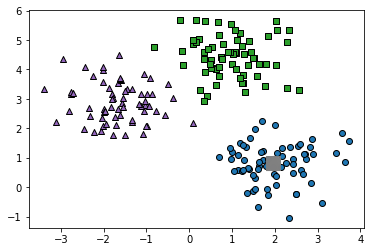

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  ceter_x_y=centers[label]
  
  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,edgecolor='k',marker=''%label)

plt.show()

# target 값과 군집 lable 값 비교

In [23]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       1                  67
1       0                  67
2       2                  66
Name: meanshift_label, dtype: int64


# 평균 이동 장점
- 이상치의 영향력이 크지 않고 유연한(특정 분포 기반 모델 가정X) 군집화가 가능하다.
- 미리 군집의 개수를 정할 필요가 없다.

# 평균 이동 단점
- 알고리즘 수행 시간이 오래 걸림
- bandwidth 크기에 따른 군집화 영향도가 매우 큼

# 04 GMM(Gaussian Mixture Model)


# GMM 소개
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에서 군집화를 수행하는 방식
- 정규분포=가우시안분포
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주, 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출
- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식
- 예) 1000개의 데이터 세트가 있다면, 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식 = 모수 추정
- 모수 추정: 1) 개별 정규 분포의 평균과 분산 2) 각 데ㅣㅇ터가 어떤 정규 분포에 해당되는 지에 대한 확률
- 위와 같은 모수 추정을 위해 GMM은 EM 방법을 적용 : GaussianMixture 클래스

# GMM을 이용한 붓꽃 데잍 세트 군집화
- GMM은 확률 기반 군집화

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

#좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

- GaussianMixture의 중요한 초기화 파라미터: n_components -> GaussianMixture 모델의 총 개수

In [25]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster'칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target


#target값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- 앞의 K-평균 군집화 결과보다 더 효과적인 분류 결과 도출

# k-평균 군집화 수행 결과 다시

In [26]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


# GMM과 K-평균의 비교

# K-Means
- 원형의 범위에서 군집화를 수행
- 데이터 세트가 원형의 범위를 가질수록 군집화 효율이 높아짐
- cluster_std를 작게 하여 데이터가 원형으로 분산되게 한 결과 -> 효과적으로 K-평균 군집화가 진행됨
- 데이터가 긴 타원형을 경우 효과가 매우 떨어짐

# 군집 시각화 함수
- 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수 

```
visualize_cluster_plot(clusterobj , dataframe, label_name, iscluster=True)
```

- 함수인자
>- clusterobj : 사이킷런의 군집 수행 객체
>- dataframe: 피처 데이터 세트와 label값을 가진 데이터 프레임
>- label_name: 군집화 결과 시각화일 경우 데이터 프레임 내의 군집화 label칼럼명, make_blobs결과 시각화일 경우는 데이터 프레임 내의 target 칼럼 명
>- iscluster: 사이킷런 cluster객체가 군집 중심 좌표를 제공하면 true

In [27]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

# K-means 이용

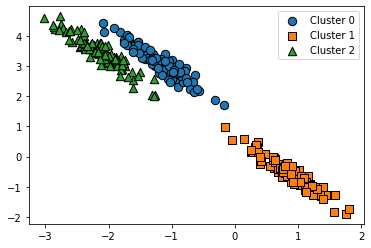

In [28]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)

# feature 데이터 세트와 make_blobs()의 y결과값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y

# 생성된 데이터 세트를 target벼로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

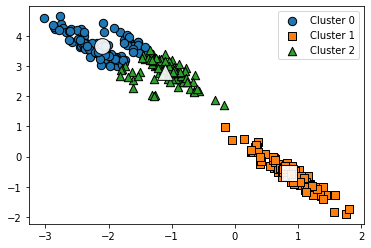

In [29]:
# 3개의 군집 기반 Kmeans를 X_aniso데이터 세트에 적용
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

- 군집화 성능이 떨어짐을 알 수 있음

# GMM으로 군집화

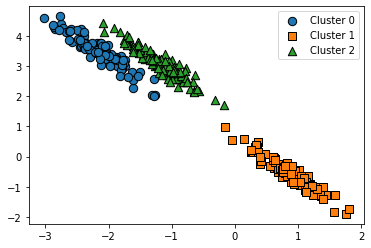

In [30]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture은 cluster_centers_속성이 없으므로 iscenter을 false로 설정
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

- 정확하게 군집화 됨
- K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에, 군집 중심 표현이 시각화 되지 않음. 

# make_blobs()의 target값과 kmeans,gmm의 군집 label값을 서로 비교해 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인

In [31]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gausian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gausian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# GMM의 장점
- K-Means 보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점

# GMM의 단점
- 군집화를 위한 수행 시간이 오래 걸림

# 05 DBSCAN

# DBSCAN 개요
- 밀도 기반 군집화의 대표적인 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함
- 특정 공간 내의 데이터 밀도 차이를 기반으로 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행
- 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식

# 주요 파라미터
- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수


# 입실론 주변 영역 내 포함되는 최소 데이터 개수를 충족시키는 가에 따라 데이터 포인트를 다음과 같이 정의
- 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트 : 주변 영역 내에 위치한 타 데이터
- 경계 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트 : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

# 사이킷런: DBSCAN 클래스의 초기화 파라미터
- eps: 입실론 주변 영역의 반경
- min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내 포함돼야 할 최소 데이터 개수

# DBSCAN 적용하기 - 붓꽃 데이터 세트
: eps=0.6(일반적으로 1 이하의 값), min_samples=8

In [32]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- -1: 노이즈를 의미하는 군집
- 즉, 위 데이터 세트는 2개의 군집으로 군집화 됨
- 군집의 개수는 알고리즘에 따라 자동으로 지정함

# DBSCAN으로 군집화 데이터 세트 시각화
- 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 시각화 함수 이용

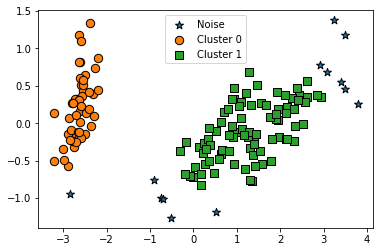

In [33]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)

# visualize_clsuter_2d()함수는 ftr1,ftr2칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0] 
irisDF['ftr2']=pca_transformed[:,1] 

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

- eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다.
- min_samples를 크게하면 반경내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커진다.

#eps 증가

In [34]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_clsuter']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_clsuter'].value_counts()
print(iris_result)

target  dbscan_clsuter
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_clsuter, dtype: int64


- 노이즈 군집이 매우 줄어들었음

#eps 0.6으로 유지하고 min_samples를 16으로 증가

In [35]:
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')

In [36]:
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_clsuter']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_clsuter'].value_counts()
print(iris_result)

target  dbscan_clsuter
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_clsuter, dtype: int64


- 노이즈 데이터가 증가함

# DBSCAN 적용하기 - make_circles() 데이터 세트

- make_circle() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만들기
- 파라미터 noise는 노이즈 데이터 세트의 비율, factor는 외부 원과 내부 원의 scale 비율

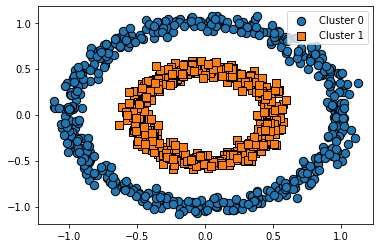

In [37]:
from sklearn.datasets import make_circles

X,y= make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

# K-평균으로 make_circles() 데이터 세트를 군집화

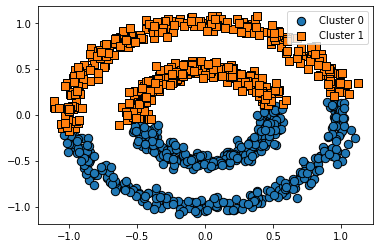

In [38]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels


visualize_cluster_plot(None,clusterDF,'kmeans_cluster',iscenter=False)

# GMM으로 make_circles()데이터 세트를 군집화 수행

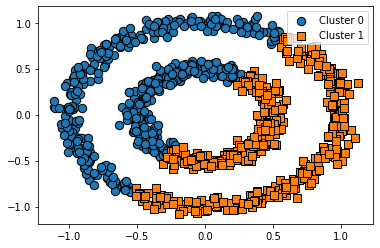

In [39]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.

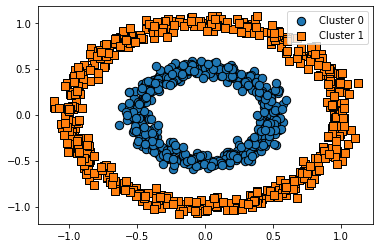

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)